In [32]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [33]:
def k_fold_cross_validation(model, X, y, k=5, random_state=15):
    """
    Perform k-fold cross-validation for a given model.
    
    Args:
        model: The machine learning model to evaluate.
        X: Feature matrix (numpy array).
        y: Target vector (numpy array).
        k: Number of folds (default is 5).
        random_state: Random seed for reproducibility (default is None).

    Returns:
        - mean_val_error: The average validation error across k folds.
        - fold_errors: List of validation errors for each fold.
    """
    n_samples = len(X)
    indices = np.arange(n_samples)

    if random_state is not None:
        np.random.seed(random_state)
    np.random.shuffle(indices)

    fold_size = n_samples // k
    fold_errors = []

    for i in range(k):
        val_indices = indices[i * fold_size : (i + 1) * fold_size]
        train_indices = np.setdiff1d(indices, val_indices)

        X_train_fold, X_val_fold = X[train_indices], X[val_indices]
        y_train_fold, y_val_fold = y[train_indices], y[val_indices]

        model.fit(X_train_fold, y_train_fold)
        y_val_pred = model.predict(X_val_fold)
        val_accuracy = accuracy_score(y_val_fold, y_val_pred)
        val_error = 1 - val_accuracy
        fold_errors.append(val_error)

    mean_val_error = np.mean(fold_errors)
    return mean_val_error

In [34]:
# Load preprocessed data
train_images = np.load('train_images_flat.npy')
train_labels = np.load('train_labels_noisy.npy')
train_images_subset = np.load('train_images_flat_subset.npy')
train_labels_subset = np.load('train_labels_noisy_subset.npy')
test_images = np.load('test_images_flat.npy')
test_labels = np.load('test_labels_binary.npy')

# Define logarithmic grid for gamma and C
gamma_values = np.logspace(-5, 4, num=10)  # 10 values from 10^-5 to 10^4
C_values = np.logspace(-5, 4, num=10)      # 10 values from 10^-5 to 10^4

In [35]:
# Function to find optimal C for a given gamma
def find_optimal_C(X, y, gamma, C_values, k=5):
    best_C = None
    best_error = np.inf  # Initialize with highest possible error

    for C in C_values:
        model = SVC(kernel='rbf', gamma=gamma, C=C, max_iter=5000)
        mean_val_error = k_fold_cross_validation(model, X, y, k)

        if mean_val_error < best_error:
            best_error = mean_val_error
            best_C = C

    return best_C

# Function to find optimal gamma
def find_optimal_gamma(X, y, gamma_values, C_values, k=5):
    best_gamma = None
    best_error = np.inf  # Initialize with highest possible error

    for gamma in gamma_values:
        # Find optimal C for this gamma
        C_gamma = find_optimal_C(X, y, gamma, C_values, k)

        # Evaluate the model with (gamma, C_gamma)
        model = SVC(kernel='rbf', gamma=gamma, C=C_gamma, max_iter=5000)
        mean_val_error = k_fold_cross_validation(model, X, y, k)

        if mean_val_error < best_error:
            best_error = mean_val_error
            best_gamma = gamma

    return best_gamma


In [36]:
# Find optimal gamma and C_gamma using the subset of training data
optimal_gamma = find_optimal_gamma(train_images_subset, train_labels_subset, gamma_values, C_values)

# Find optimal C for the optimal gamma using the subset of training data
optimal_C = find_optimal_C(train_images_subset, train_labels_subset, optimal_gamma, C_values)

# Train the final model on the full training set
final_model = SVC(kernel='rbf', gamma=optimal_gamma, C=optimal_C, max_iter=5000)
final_model.fit(train_images, train_labels)

# Evaluate on the test set
test_predictions = final_model.predict(test_images)
test_accuracy = accuracy_score(test_labels, test_predictions)
test_error = 1 - test_accuracy

print(f"Optimal gamma: {optimal_gamma}, Optimal C: {optimal_C}")
print(f"Test error: {test_error}")


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

Optimal gamma: 1e-05, Optimal C: 10000.0
Test error: 0.039000000000000035


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

Gamma: 0.0000, C: 10000.0000, Training Error: 0.0273, Test Error: 0.0390


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

Gamma: 0.0001, C: 1000.0000, Training Error: 0.0253, Test Error: 0.0365


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5

Gamma: 0.0010, C: 1.0000, Training Error: 0.0502, Test Error: 0.0510


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gamma: 0.0100, C: 10.0000, Training Error: 0.0035, Test Error: 0.0180


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gamma: 0.1000, C: 0.0000, Training Error: 0.1181, Test Error: 0.1120


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gamma: 1.0000, C: 0.0000, Training Error: 0.0000, Test Error: 0.3300


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gamma: 10.0000, C: 0.0000, Training Error: 0.0081, Test Error: 0.0515


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gamma: 100.0000, C: 0.0000, Training Error: 0.0767, Test Error: 0.4625


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gamma: 1000.0000, C: 0.0000, Training Error: 0.0833, Test Error: 0.5000


c:\Users\abrau\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Gamma: 10000.0000, C: 0.0000, Training Error: 0.0833, Test Error: 0.5000

Best Training Error: 0.0000 at Gamma = 1.0000, C = 0.0000
Best Test Error: 0.0180 at Gamma = 0.0100, C = 10.0000


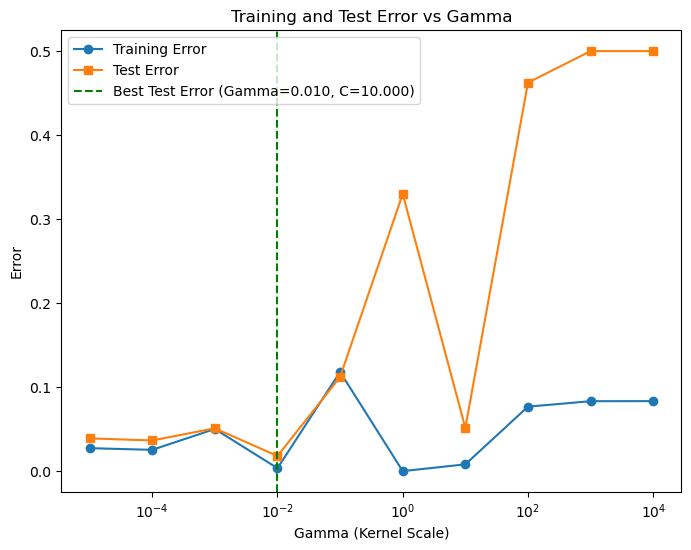


Optimal gamma: 0.0100
Optimal C value: 10.0000
Test error of best Gaussian SVM: 0.0180


In [37]:
training_errors = []
test_errors = []

# Initialize variables to track the best errors and corresponding gamma/C values
best_train_error = np.inf
best_test_error = np.inf
best_gamma = None
best_C = None

# Compute training and test error for each gamma value
for gamma in gamma_values:
    # Find optimal C for this gamma using the subset of training data
    C_gamma = find_optimal_C(train_images_subset, train_labels_subset, gamma, C_values)
    
    # Train the model on the full training set
    model = SVC(kernel='rbf', gamma=gamma, C=C_gamma, max_iter=5000, random_state=15)
    model.fit(train_images, train_labels)
    
    # Compute training error
    train_predictions = model.predict(train_images)
    train_accuracy = accuracy_score(train_labels, train_predictions)
    train_error = 1 - train_accuracy
    training_errors.append(train_error)
    
    # Compute test error
    test_predictions = model.predict(test_images)
    test_accuracy = accuracy_score(test_labels, test_predictions)
    test_error = 1 - test_accuracy
    test_errors.append(test_error)
    
    # Track the best training error and corresponding gamma/C
    if train_error < best_train_error:
        best_train_error = train_error
        best_train_gamma = gamma
        best_train_C = C_gamma
    
    # Track the best test error and corresponding gamma/C
    if test_error < best_test_error:
        best_test_error = test_error
        best_gamma = gamma
        best_C = C_gamma
    
    # Print progress
    print(f"Gamma: {gamma:.4f}, C: {C_gamma:.4f}, Training Error: {train_error:.4f}, Test Error: {test_error:.4f}")

# Output the best errors and corresponding gamma/C values
print("\nBest Training Error: {:.4f} at Gamma = {:.4f}, C = {:.4f}".format(best_train_error, best_train_gamma, best_train_C))
print("Best Test Error: {:.4f} at Gamma = {:.4f}, C = {:.4f}".format(best_test_error, best_gamma, best_C))

# Plot training and test error vs gamma
plt.figure(figsize=(8, 6))
plt.semilogx(gamma_values, training_errors, label='Training Error', marker='o')
plt.semilogx(gamma_values, test_errors, label='Test Error', marker='s')
plt.axvline(best_gamma, color='green', linestyle='--', label=f'Best Test Error (Gamma={best_gamma:.3f}, C={best_C:.3f})')
plt.xlabel('Gamma (Kernel Scale)')
plt.ylabel('Error')
plt.title('Training and Test Error vs Gamma')
plt.legend()
plt.show()

# Compare test error to linear SVM
print(f"\nOptimal gamma: {best_gamma:.4f}")
print(f"Optimal C value: {best_C:.4f}")
print(f"Test error of best Gaussian SVM: {best_test_error:.4f}")



Best Training Error: 0.0000 at Gamma = 1.0000, C = 0.0000
Best Test Error: 0.0180 at Gamma = 0.0100, C = 10.0000


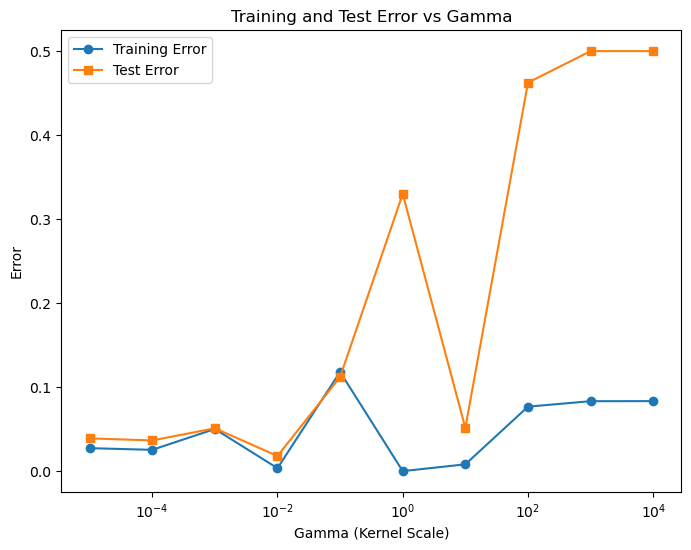


Optimal gamma: 0.0100
Optimal C value: 10.0000
Test error of best Gaussian SVM: 0.0180


In [38]:
# Output the best errors and corresponding gamma/C values
print("\nBest Training Error: {:.4f} at Gamma = {:.4f}, C = {:.4f}".format(best_train_error, best_train_gamma, best_train_C))
print("Best Test Error: {:.4f} at Gamma = {:.4f}, C = {:.4f}".format(best_test_error, best_gamma, best_C))

# Plot training and test error vs gamma
plt.figure(figsize=(8, 6))
plt.semilogx(gamma_values, training_errors, label='Training Error', marker='o')
plt.semilogx(gamma_values, test_errors, label='Test Error', marker='s')
plt.xlabel('Gamma (Kernel Scale)')
plt.ylabel('Error')
plt.title('Training and Test Error vs Gamma')
plt.legend()
plt.show()

# Compare test error to linear SVM
print(f"\nOptimal gamma: {best_gamma:.4f}")
print(f"Optimal C value: {best_C:.4f}")
print(f"Test error of best Gaussian SVM: {best_test_error:.4f}")